# 聚类

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("BLE_RSSI_dataset\iBeacon_RSSI_Labeled.csv")
# data.head()
# print(data.info())

In [5]:
X=data.drop(['location','date'],axis=1)
# X_mean=X.mean(axis=0) #均值代替缺失值
# for row in X:
#     for col in X.index:
#         if X[row][col]==-200:
#             X[row][col]=X_mean[row]

## DBScan

In [23]:
from sklearn.cluster import DBSCAN

In [122]:
clustering = DBSCAN(eps=0.5, min_samples=2).fit(X)
label=clustering.labels_

In [123]:
#聚类效果
from sklearn import metrics
metrics.silhouette_score(X, label)

0.4128485921118394

<function matplotlib.pyplot.show(*args, **kw)>

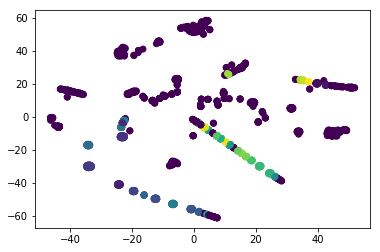

In [61]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2,learning_rate=200).fit_transform(X)
X_embedded.shape
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=clustering.labels_)
plt.show

## kmeans

In [75]:
from sklearn.cluster import KMeans

In [91]:
kmeans = KMeans(n_clusters=50, random_state=0).fit(X)
kmeans.labels_

array([6, 6, 6, ..., 5, 5, 5])

In [103]:
from sklearn import metrics
metrics.silhouette_score(X, kmeans.labels_)

0.9275119837253877

<function matplotlib.pyplot.show(*args, **kw)>

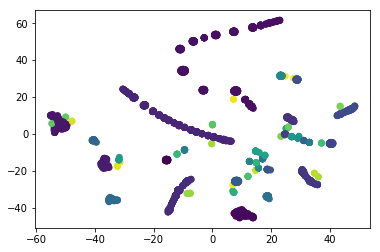

In [92]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2,learning_rate=200).fit_transform(X)
X_embedded.shape
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=kmeans.labels_)
plt.show

## GMM

In [15]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=50)
gmm.fit(X)
labels=gmm.predict(X)

In [16]:
from sklearn import metrics
metrics.silhouette_score(X,labels)

0.8719717201085537

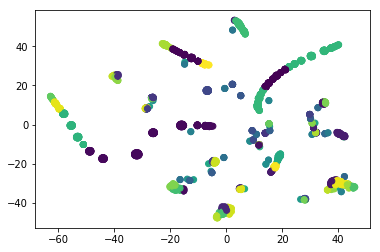

In [14]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)

plt.scatter(X_embedded[:, 0], X_embedded[:,1],c=labels)
plt.show()

## 层次聚类法

In [127]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering().fit(X)
hc.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [129]:
from sklearn import metrics
metrics.silhouette_score(X,hc.labels_)

0.2729861875905149

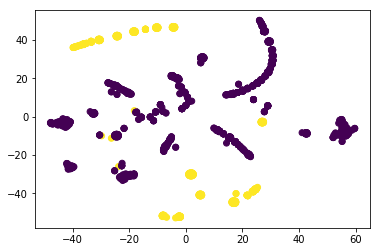

In [130]:
plt.scatter(X_embedded[:, 0], X_embedded[:,1],c=hc.labels_)
plt.show()